In [ ]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784', parser='auto')

In [ ]:
import numpy as np
import torch
X = torch.tensor(dataset.data.to_numpy(np.float32))
y = torch.tensor(dataset.target.to_numpy(np.int64))

In [ ]:
X = X.reshape(-1, 1, 28, 28) # 나머지 전부 # 1: 흑백 CHANNEL
X.shape

torch.Size([70000, 1, 28, 28])

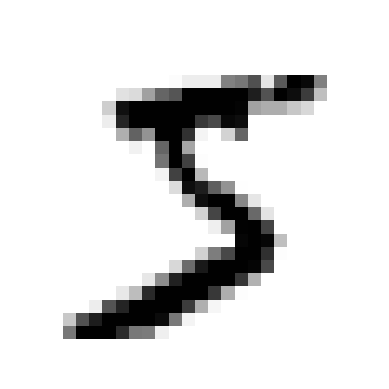

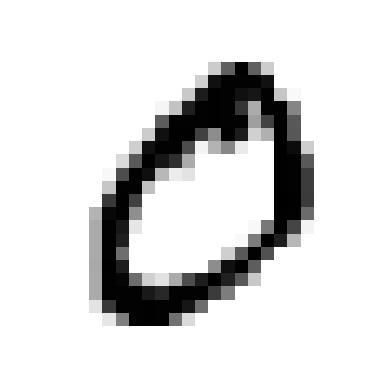

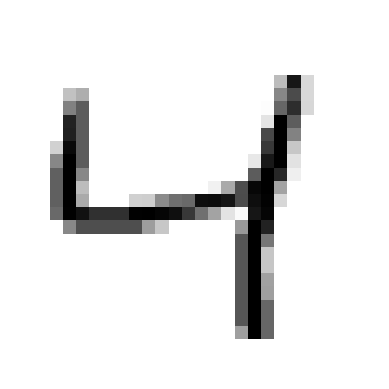

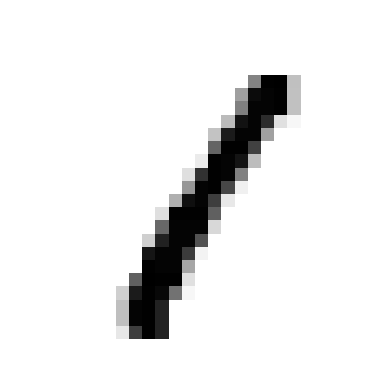

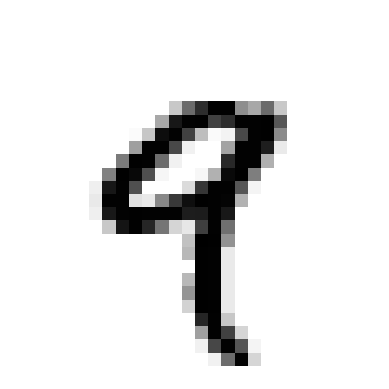

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  image = X[i, 0] # CHANNEL에서 0번 째 데이터를 가져와 CHANNEL 없앰.
  plt.imshow(image, cmap = "binary")
  plt.axis("off")
  plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # 2차원, 입력, 출력, 커널 사이즈 3X3 -> strde 자동 1
        self.pool = nn.MaxPool2d(2, 2) # kernel 2x2 / stride 2
        self.conv2 = nn.Conv2d(6, 16, 3) # Maxpool layer를 새로 정의 x, 그대로 사용
        self.fc1 = nn.Linear(16 * 5 * 5, hidden_units) # 마지막 pooling layer를 print해서 FCL의 입력 설정
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x): # activation func
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN(100)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
def train(model, optimizer, criterion):
  for epoch in range(100):
    y_pred = model(X)

    loss = criterion(y_pred, y)
    print(f"Epoch: {epoch} / Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train(model, optimizer, criterion)

Epoch: 0 / Loss: 9.70373249053955
Epoch: 1 / Loss: 17.134521484375
Epoch: 2 / Loss: 5.508296966552734
Epoch: 3 / Loss: 2.748676300048828
Epoch: 4 / Loss: 2.4977126121520996
Epoch: 5 / Loss: 2.405489683151245
Epoch: 6 / Loss: 2.356814384460449
Epoch: 7 / Loss: 2.3263914585113525
Epoch: 8 / Loss: 2.30499005317688
Epoch: 9 / Loss: 2.288329839706421
Epoch: 10 / Loss: 2.274331569671631
Epoch: 11 / Loss: 2.261767625808716
Epoch: 12 / Loss: 2.249920606613159
Epoch: 13 / Loss: 2.2383077144622803
Epoch: 14 / Loss: 2.2265710830688477
Epoch: 15 / Loss: 2.214447259902954
Epoch: 16 / Loss: 2.2016663551330566
Epoch: 17 / Loss: 2.187934637069702
Epoch: 18 / Loss: 2.173050880432129
Epoch: 19 / Loss: 2.15669846534729
Epoch: 20 / Loss: 2.1385867595672607
Epoch: 21 / Loss: 2.118387460708618
Epoch: 22 / Loss: 2.0956599712371826
Epoch: 23 / Loss: 2.070011854171753
Epoch: 24 / Loss: 2.0409090518951416
Epoch: 25 / Loss: 2.007625102996826
Epoch: 26 / Loss: 1.9697120189666748
Epoch: 27 / Loss: 1.92630720138549

In [ ]:
y_pred = model(X[:5])
y_pred.shape

torch.Size([5, 10])

In [ ]:
y_pred.argmax(1)

tensor([5, 0, 4, 1, 9])

In [ ]:
# 결과적으로 inductive bias를 가진 CNN이 MLP 모델보다 훨씬 적은 parameter에도 비슷한 loss를 기록함.